In [1]:
from keras.datasets import boston_housing

Using TensorFlow backend.


In [16]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [17]:
train_data.shape

(404, 13)

In [18]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [19]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

[]

In [20]:
import keras.backend.tensorflow_backend as Keras_GPU

In [21]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10883658864016812640
]


In [22]:
mean = train_data.mean(axis=0)

In [23]:
mean

array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
       5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
       9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
       1.27408168e+01])

In [24]:
train_data.shape

(404, 13)

In [25]:
train_data -= mean

In [26]:
train_data

array([[ -2.51264057, -11.48019802,  -2.96443069, ...,   2.5240099 ,
         42.11683168,   5.97918317],
       [ -3.72334057,  71.01980198,  -9.07443069, ...,  -3.7759901 ,
         40.59683168,  -9.63081683],
       [  1.15310943, -11.48019802,   6.99556931, ...,   1.7240099 ,
         20.73683168,  -9.48081683],
       ...,
       [ -3.71045057,  23.51980198,  -5.04443069, ...,  -1.5759901 ,
          7.46683168,  -4.91081683],
       [ -1.59593057, -11.48019802,   8.47556931, ...,  -3.7759901 ,
        -92.83316832,   3.04918317],
       [ -3.73072057,  48.51980198,  -8.17443069, ...,  -2.8759901 ,
         21.91683168,  -8.36081683]])

In [27]:
train_data.shape

(404, 13)

In [30]:
std= train_data.std(axis=0)

In [31]:
std

array([9.22929073e+00, 2.37382770e+01, 6.80287253e+00, 2.40939633e-01,
       1.17147847e-01, 7.08908627e-01, 2.79060634e+01, 2.02770050e+00,
       8.68758849e+00, 1.66168506e+02, 2.19765689e+00, 9.39946015e+01,
       7.24556085e+00])

In [32]:
train_data /= std

In [33]:
train_data

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

In [34]:
test_data -= mean
test_data /= std

In [35]:
from keras import models
from keras import layers

In [41]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64,activation='relu',))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model



In [45]:
import numpy as np

k=4

num_val_samples= len(train_data)//4
num_epochs = 500
all_mae_histories= []

for i in range(k):
    print('처리중인 폴드 #', i)
    val_data = train_data[i*num_val_samples:(i+1) * num_val_samples]
    val_targets = train_targets[i*num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate( [train_data[:i*num_val_samples],
                                          train_data[(i+1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate( [train_targets[:i*num_val_samples],
                                            train_targets[(i+1)* num_val_samples:]],axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data,partial_train_targets,
                        validation_data=(val_data, val_targets),
             epochs = num_epochs, batch_size=1)
    mae_history= history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)
    

처리중인 폴드 # 0
Train on 303 samples, validate on 101 samples
Epoch 1/500
303/303 [==============================] - 1s 2ms/step - loss: 172.3063 - mean_absolute_error: 9.9995 - val_loss: 30.3667 - val_mean_absolute_error: 3.8352
Epoch 2/500
303/303 [==============================] - 0s 848us/step - loss: 26.5979 - mean_absolute_error: 3.5060 - val_loss: 20.3579 - val_mean_absolute_error: 2.7898
Epoch 3/500
303/303 [==============================] - 0s 795us/step - loss: 19.3642 - mean_absolute_error: 2.8775 - val_loss: 17.4801 - val_mean_absolute_error: 2.5965
Epoch 4/500
303/303 [==============================] - 0s 798us/step - loss: 17.6777 - mean_absolute_error: 2.7136 - val_loss: 14.9171 - val_mean_absolute_error: 2.3453
Epoch 5/500
303/303 [==============================] - 0s 755us/step - loss: 16.0331 - mean_absolute_error: 2.6369 - val_loss: 15.0310 - val_mean_absolute_error: 2.4165
Epoch 6/500
303/303 [==============================] - 0s 745us/step - loss: 14.7644 - mean_absolu

303/303 [==============================] - 0s 811us/step - loss: 7.1074 - mean_absolute_error: 1.7367 - val_loss: 8.5039 - val_mean_absolute_error: 2.0509
Epoch 50/500
303/303 [==============================] - 0s 848us/step - loss: 7.3945 - mean_absolute_error: 1.7548 - val_loss: 8.6039 - val_mean_absolute_error: 1.8641
Epoch 51/500
303/303 [==============================] - 0s 871us/step - loss: 7.0819 - mean_absolute_error: 1.7431 - val_loss: 8.0581 - val_mean_absolute_error: 1.8580
Epoch 52/500
303/303 [==============================] - 0s 752us/step - loss: 6.8598 - mean_absolute_error: 1.7727 - val_loss: 10.3921 - val_mean_absolute_error: 2.0501
Epoch 53/500
303/303 [==============================] - 0s 709us/step - loss: 6.7093 - mean_absolute_error: 1.7261 - val_loss: 11.7507 - val_mean_absolute_error: 2.6192
Epoch 54/500
303/303 [==============================] - 0s 709us/step - loss: 6.6675 - mean_absolute_error: 1.7090 - val_loss: 10.3550 - val_mean_absolute_error: 2.2559
Ep

Epoch 98/500
303/303 [==============================] - 0s 798us/step - loss: 4.5198 - mean_absolute_error: 1.4125 - val_loss: 8.5999 - val_mean_absolute_error: 1.9849
Epoch 99/500
303/303 [==============================] - 0s 719us/step - loss: 4.2438 - mean_absolute_error: 1.3500 - val_loss: 11.7798 - val_mean_absolute_error: 2.3515
Epoch 100/500
303/303 [==============================] - 0s 752us/step - loss: 4.2521 - mean_absolute_error: 1.4170 - val_loss: 9.2555 - val_mean_absolute_error: 2.1266
Epoch 101/500
303/303 [==============================] - 0s 742us/step - loss: 4.3715 - mean_absolute_error: 1.4219 - val_loss: 8.7498 - val_mean_absolute_error: 2.0206
Epoch 102/500
303/303 [==============================] - 0s 729us/step - loss: 4.2391 - mean_absolute_error: 1.3702 - val_loss: 9.8042 - val_mean_absolute_error: 2.0204
Epoch 103/500
303/303 [==============================] - 0s 792us/step - loss: 4.3825 - mean_absolute_error: 1.3947 - val_loss: 9.3738 - val_mean_absolute_e

303/303 [==============================] - 0s 749us/step - loss: 2.9461 - mean_absolute_error: 1.1625 - val_loss: 10.7225 - val_mean_absolute_error: 2.4210
Epoch 147/500
303/303 [==============================] - 0s 706us/step - loss: 3.0486 - mean_absolute_error: 1.1806 - val_loss: 9.9862 - val_mean_absolute_error: 2.0885
Epoch 148/500
303/303 [==============================] - 0s 716us/step - loss: 2.9322 - mean_absolute_error: 1.1698 - val_loss: 8.2735 - val_mean_absolute_error: 2.0576
Epoch 149/500
303/303 [==============================] - 0s 798us/step - loss: 2.7757 - mean_absolute_error: 1.1850 - val_loss: 11.3212 - val_mean_absolute_error: 2.4948
Epoch 150/500
303/303 [==============================] - 0s 805us/step - loss: 2.8057 - mean_absolute_error: 1.1933 - val_loss: 9.4525 - val_mean_absolute_error: 2.2230
Epoch 151/500
303/303 [==============================] - 0s 811us/step - loss: 2.9122 - mean_absolute_error: 1.1664 - val_loss: 9.4691 - val_mean_absolute_error: 2.061

303/303 [==============================] - 0s 732us/step - loss: 2.3284 - mean_absolute_error: 1.0968 - val_loss: 9.3344 - val_mean_absolute_error: 2.2241
Epoch 195/500
303/303 [==============================] - 0s 732us/step - loss: 2.0463 - mean_absolute_error: 1.0411 - val_loss: 10.1355 - val_mean_absolute_error: 2.2312
Epoch 196/500
303/303 [==============================] - 0s 844us/step - loss: 2.4747 - mean_absolute_error: 1.0664 - val_loss: 9.1649 - val_mean_absolute_error: 2.3358
Epoch 197/500
303/303 [==============================] - 0s 802us/step - loss: 2.4281 - mean_absolute_error: 1.0788 - val_loss: 8.6244 - val_mean_absolute_error: 2.0633
Epoch 198/500
303/303 [==============================] - 0s 792us/step - loss: 2.2339 - mean_absolute_error: 1.0316 - val_loss: 9.8619 - val_mean_absolute_error: 2.2842
Epoch 199/500
303/303 [==============================] - 0s 755us/step - loss: 2.1306 - mean_absolute_error: 1.0124 - val_loss: 8.4708 - val_mean_absolute_error: 2.1152

303/303 [==============================] - 0s 858us/step - loss: 1.7489 - mean_absolute_error: 0.9503 - val_loss: 9.6543 - val_mean_absolute_error: 2.2763
Epoch 243/500
303/303 [==============================] - 0s 782us/step - loss: 1.5951 - mean_absolute_error: 0.9085 - val_loss: 10.8514 - val_mean_absolute_error: 2.3383
Epoch 244/500
303/303 [==============================] - 0s 802us/step - loss: 1.9040 - mean_absolute_error: 0.9414 - val_loss: 11.9526 - val_mean_absolute_error: 2.3802
Epoch 245/500
303/303 [==============================] - 0s 706us/step - loss: 1.8015 - mean_absolute_error: 0.9462 - val_loss: 9.6483 - val_mean_absolute_error: 2.1713
Epoch 246/500
303/303 [==============================] - 0s 719us/step - loss: 1.8499 - mean_absolute_error: 0.9603 - val_loss: 9.3131 - val_mean_absolute_error: 2.1204
Epoch 247/500
303/303 [==============================] - 0s 699us/step - loss: 1.7670 - mean_absolute_error: 0.9688 - val_loss: 10.2649 - val_mean_absolute_error: 2.12

303/303 [==============================] - 0s 844us/step - loss: 1.5839 - mean_absolute_error: 0.9033 - val_loss: 10.2010 - val_mean_absolute_error: 2.2260
Epoch 291/500
303/303 [==============================] - 0s 745us/step - loss: 1.5088 - mean_absolute_error: 0.8752 - val_loss: 9.1889 - val_mean_absolute_error: 2.1382
Epoch 292/500
303/303 [==============================] - 0s 732us/step - loss: 1.4429 - mean_absolute_error: 0.8776 - val_loss: 8.3246 - val_mean_absolute_error: 2.1029
Epoch 293/500
303/303 [==============================] - 0s 706us/step - loss: 1.5161 - mean_absolute_error: 0.8550 - val_loss: 10.0519 - val_mean_absolute_error: 2.2351
Epoch 294/500
303/303 [==============================] - 0s 722us/step - loss: 1.6315 - mean_absolute_error: 0.8825 - val_loss: 10.5012 - val_mean_absolute_error: 2.2077
Epoch 295/500
303/303 [==============================] - 0s 759us/step - loss: 1.6126 - mean_absolute_error: 0.8828 - val_loss: 9.3545 - val_mean_absolute_error: 2.21

303/303 [==============================] - 0s 719us/step - loss: 1.3093 - mean_absolute_error: 0.8360 - val_loss: 8.6631 - val_mean_absolute_error: 2.1256
Epoch 339/500
303/303 [==============================] - 0s 703us/step - loss: 1.2404 - mean_absolute_error: 0.7844 - val_loss: 10.5097 - val_mean_absolute_error: 2.2271
Epoch 340/500
303/303 [==============================] - 0s 699us/step - loss: 1.1762 - mean_absolute_error: 0.7781 - val_loss: 10.0998 - val_mean_absolute_error: 2.1989
Epoch 341/500
303/303 [==============================] - 0s 785us/step - loss: 1.1937 - mean_absolute_error: 0.8070 - val_loss: 9.5062 - val_mean_absolute_error: 2.1857
Epoch 342/500
303/303 [==============================] - 0s 811us/step - loss: 1.2270 - mean_absolute_error: 0.7884 - val_loss: 8.6194 - val_mean_absolute_error: 2.1164
Epoch 343/500
303/303 [==============================] - 0s 821us/step - loss: 1.2734 - mean_absolute_error: 0.8153 - val_loss: 9.8195 - val_mean_absolute_error: 2.296

303/303 [==============================] - 0s 679us/step - loss: 1.0185 - mean_absolute_error: 0.7424 - val_loss: 9.9676 - val_mean_absolute_error: 2.2055
Epoch 387/500
303/303 [==============================] - 0s 686us/step - loss: 1.1680 - mean_absolute_error: 0.7805 - val_loss: 10.2177 - val_mean_absolute_error: 2.2492
Epoch 388/500
303/303 [==============================] - 0s 729us/step - loss: 1.2109 - mean_absolute_error: 0.7441 - val_loss: 8.7941 - val_mean_absolute_error: 2.1562
Epoch 389/500
303/303 [==============================] - 0s 765us/step - loss: 1.1788 - mean_absolute_error: 0.7984 - val_loss: 9.7610 - val_mean_absolute_error: 2.1860
Epoch 390/500
303/303 [==============================] - 0s 722us/step - loss: 1.1612 - mean_absolute_error: 0.7670 - val_loss: 11.9593 - val_mean_absolute_error: 2.4048
Epoch 391/500
303/303 [==============================] - 0s 676us/step - loss: 1.1236 - mean_absolute_error: 0.7743 - val_loss: 8.9339 - val_mean_absolute_error: 2.128

303/303 [==============================] - 0s 858us/step - loss: 1.0612 - mean_absolute_error: 0.7408 - val_loss: 10.4343 - val_mean_absolute_error: 2.2249
Epoch 435/500
303/303 [==============================] - 0s 815us/step - loss: 1.1472 - mean_absolute_error: 0.7339 - val_loss: 9.6337 - val_mean_absolute_error: 2.2445
Epoch 436/500
303/303 [==============================] - 0s 792us/step - loss: 1.1672 - mean_absolute_error: 0.7354 - val_loss: 9.7306 - val_mean_absolute_error: 2.2253
Epoch 437/500
303/303 [==============================] - 0s 729us/step - loss: 0.9364 - mean_absolute_error: 0.6764 - val_loss: 8.5345 - val_mean_absolute_error: 2.0978
Epoch 438/500
303/303 [==============================] - 0s 732us/step - loss: 0.9795 - mean_absolute_error: 0.7058 - val_loss: 8.1490 - val_mean_absolute_error: 2.0216
Epoch 439/500
303/303 [==============================] - 0s 729us/step - loss: 0.9743 - mean_absolute_error: 0.7189 - val_loss: 9.1137 - val_mean_absolute_error: 2.1559

303/303 [==============================] - 0s 828us/step - loss: 1.0237 - mean_absolute_error: 0.7191 - val_loss: 10.2681 - val_mean_absolute_error: 2.3543
Epoch 483/500
303/303 [==============================] - 0s 722us/step - loss: 0.9256 - mean_absolute_error: 0.7402 - val_loss: 11.1646 - val_mean_absolute_error: 2.3040
Epoch 484/500
303/303 [==============================] - 0s 712us/step - loss: 1.0092 - mean_absolute_error: 0.6974 - val_loss: 8.5333 - val_mean_absolute_error: 2.1003
Epoch 485/500
303/303 [==============================] - 0s 703us/step - loss: 0.9915 - mean_absolute_error: 0.7139 - val_loss: 9.3080 - val_mean_absolute_error: 2.2178
Epoch 486/500
303/303 [==============================] - 0s 709us/step - loss: 1.0776 - mean_absolute_error: 0.7021 - val_loss: 12.1991 - val_mean_absolute_error: 2.3407
Epoch 487/500
303/303 [==============================] - 0s 755us/step - loss: 0.9577 - mean_absolute_error: 0.6903 - val_loss: 9.1123 - val_mean_absolute_error: 2.12

303/303 [==============================] - 0s 835us/step - loss: 7.1547 - mean_absolute_error: 1.8264 - val_loss: 8.8531 - val_mean_absolute_error: 2.3002
Epoch 31/500
303/303 [==============================] - 0s 864us/step - loss: 7.5013 - mean_absolute_error: 1.7734 - val_loss: 10.5757 - val_mean_absolute_error: 2.5111
Epoch 32/500
303/303 [==============================] - 0s 831us/step - loss: 6.9683 - mean_absolute_error: 1.7568 - val_loss: 9.0799 - val_mean_absolute_error: 2.3638
Epoch 33/500
303/303 [==============================] - 0s 716us/step - loss: 6.8637 - mean_absolute_error: 1.7715 - val_loss: 9.4546 - val_mean_absolute_error: 2.4206
Epoch 34/500
303/303 [==============================] - 0s 716us/step - loss: 6.9533 - mean_absolute_error: 1.7482 - val_loss: 9.9346 - val_mean_absolute_error: 2.4760
Epoch 35/500
303/303 [==============================] - 0s 722us/step - loss: 6.8494 - mean_absolute_error: 1.7067 - val_loss: 10.3089 - val_mean_absolute_error: 2.4362
Epo

Epoch 79/500
303/303 [==============================] - 0s 729us/step - loss: 3.4509 - mean_absolute_error: 1.3082 - val_loss: 29.1268 - val_mean_absolute_error: 3.8602
Epoch 80/500
303/303 [==============================] - 0s 749us/step - loss: 4.1049 - mean_absolute_error: 1.4296 - val_loss: 14.4666 - val_mean_absolute_error: 2.6037
Epoch 81/500
303/303 [==============================] - 0s 722us/step - loss: 4.3074 - mean_absolute_error: 1.4170 - val_loss: 12.1045 - val_mean_absolute_error: 2.3207
Epoch 82/500
303/303 [==============================] - 0s 736us/step - loss: 3.7891 - mean_absolute_error: 1.3192 - val_loss: 14.4860 - val_mean_absolute_error: 2.7898
Epoch 83/500
303/303 [==============================] - 0s 825us/step - loss: 4.3833 - mean_absolute_error: 1.3905 - val_loss: 11.9514 - val_mean_absolute_error: 2.3216
Epoch 84/500
303/303 [==============================] - 0s 825us/step - loss: 3.9240 - mean_absolute_error: 1.3716 - val_loss: 14.7004 - val_mean_absolute_

303/303 [==============================] - 0s 749us/step - loss: 2.9860 - mean_absolute_error: 1.1973 - val_loss: 14.1360 - val_mean_absolute_error: 2.4839
Epoch 128/500
303/303 [==============================] - 0s 808us/step - loss: 2.6262 - mean_absolute_error: 1.1373 - val_loss: 14.1190 - val_mean_absolute_error: 2.6507
Epoch 129/500
303/303 [==============================] - 0s 841us/step - loss: 2.8536 - mean_absolute_error: 1.1442 - val_loss: 14.2005 - val_mean_absolute_error: 2.4203
Epoch 130/500
303/303 [==============================] - 0s 815us/step - loss: 2.9050 - mean_absolute_error: 1.1513 - val_loss: 15.9898 - val_mean_absolute_error: 2.5387
Epoch 131/500
303/303 [==============================] - 0s 792us/step - loss: 2.5313 - mean_absolute_error: 1.1188 - val_loss: 13.2572 - val_mean_absolute_error: 2.3378
Epoch 132/500
303/303 [==============================] - 0s 716us/step - loss: 2.5905 - mean_absolute_error: 1.1374 - val_loss: 12.5287 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 848us/step - loss: 2.2143 - mean_absolute_error: 1.0719 - val_loss: 18.3925 - val_mean_absolute_error: 2.7937
Epoch 176/500
303/303 [==============================] - 0s 775us/step - loss: 1.8773 - mean_absolute_error: 0.9984 - val_loss: 22.9370 - val_mean_absolute_error: 2.9956
Epoch 177/500
303/303 [==============================] - 0s 716us/step - loss: 1.8651 - mean_absolute_error: 0.9683 - val_loss: 23.3372 - val_mean_absolute_error: 2.9591
Epoch 178/500
303/303 [==============================] - 0s 736us/step - loss: 1.9345 - mean_absolute_error: 1.0248 - val_loss: 21.1898 - val_mean_absolute_error: 2.8092
Epoch 179/500
303/303 [==============================] - 0s 699us/step - loss: 2.0338 - mean_absolute_error: 0.9888 - val_loss: 22.0024 - val_mean_absolute_error: 2.8093
Epoch 180/500
303/303 [==============================] - 0s 719us/step - loss: 2.0093 - mean_absolute_error: 1.0144 - val_loss: 23.6773 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 815us/step - loss: 1.5636 - mean_absolute_error: 0.9059 - val_loss: 21.0476 - val_mean_absolute_error: 2.8762
Epoch 224/500
303/303 [==============================] - 0s 712us/step - loss: 1.5028 - mean_absolute_error: 0.9170 - val_loss: 19.7754 - val_mean_absolute_error: 2.9046
Epoch 225/500
303/303 [==============================] - 0s 739us/step - loss: 1.4401 - mean_absolute_error: 0.8857 - val_loss: 21.2248 - val_mean_absolute_error: 3.0541
Epoch 226/500
303/303 [==============================] - 0s 802us/step - loss: 1.6533 - mean_absolute_error: 0.9519 - val_loss: 20.3181 - val_mean_absolute_error: 2.7226
Epoch 227/500
303/303 [==============================] - 0s 937us/step - loss: 1.3402 - mean_absolute_error: 0.8618 - val_loss: 18.0276 - val_mean_absolute_error: 2.6427
Epoch 228/500
303/303 [==============================] - 0s 864us/step - loss: 1.5343 - mean_absolute_error: 0.9238 - val_loss: 23.3928 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 798us/step - loss: 1.1917 - mean_absolute_error: 0.8118 - val_loss: 19.9729 - val_mean_absolute_error: 2.7668
Epoch 272/500
303/303 [==============================] - 0s 775us/step - loss: 1.2744 - mean_absolute_error: 0.8351 - val_loss: 11.9677 - val_mean_absolute_error: 2.4738
Epoch 273/500
303/303 [==============================] - 0s 752us/step - loss: 1.3469 - mean_absolute_error: 0.8436 - val_loss: 15.5914 - val_mean_absolute_error: 2.6300
Epoch 274/500
303/303 [==============================] - 0s 745us/step - loss: 1.1928 - mean_absolute_error: 0.8214 - val_loss: 20.7718 - val_mean_absolute_error: 2.9651
Epoch 275/500
303/303 [==============================] - 0s 765us/step - loss: 1.2243 - mean_absolute_error: 0.8377 - val_loss: 14.2901 - val_mean_absolute_error: 2.6003
Epoch 276/500
303/303 [==============================] - 0s 861us/step - loss: 1.2609 - mean_absolute_error: 0.8362 - val_loss: 20.2018 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 818us/step - loss: 1.1664 - mean_absolute_error: 0.7243 - val_loss: 23.3585 - val_mean_absolute_error: 2.9828
Epoch 320/500
303/303 [==============================] - 0s 825us/step - loss: 1.0592 - mean_absolute_error: 0.7905 - val_loss: 13.6584 - val_mean_absolute_error: 2.5970
Epoch 321/500
303/303 [==============================] - 0s 828us/step - loss: 0.9972 - mean_absolute_error: 0.7563 - val_loss: 21.9038 - val_mean_absolute_error: 2.9893
Epoch 322/500
303/303 [==============================] - 0s 953us/step - loss: 1.2201 - mean_absolute_error: 0.8287 - val_loss: 21.1216 - val_mean_absolute_error: 3.0008
Epoch 323/500
303/303 [==============================] - 0s 1ms/step - loss: 1.0393 - mean_absolute_error: 0.7881 - val_loss: 14.3324 - val_mean_absolute_error: 2.5650
Epoch 324/500
303/303 [==============================] - 0s 1ms/step - loss: 1.1616 - mean_absolute_error: 0.7738 - val_loss: 20.8949 - val_mean_absolute_error: 3.039

303/303 [==============================] - 0s 792us/step - loss: 1.1479 - mean_absolute_error: 0.7699 - val_loss: 13.2748 - val_mean_absolute_error: 2.6668
Epoch 368/500
303/303 [==============================] - 0s 732us/step - loss: 0.9131 - mean_absolute_error: 0.6903 - val_loss: 18.1999 - val_mean_absolute_error: 2.9411
Epoch 369/500
303/303 [==============================] - 0s 739us/step - loss: 1.1148 - mean_absolute_error: 0.7787 - val_loss: 14.8202 - val_mean_absolute_error: 2.6687
Epoch 370/500
303/303 [==============================] - 0s 772us/step - loss: 0.9875 - mean_absolute_error: 0.7224 - val_loss: 12.2834 - val_mean_absolute_error: 2.5030
Epoch 371/500
303/303 [==============================] - 0s 729us/step - loss: 0.9110 - mean_absolute_error: 0.7147 - val_loss: 16.7366 - val_mean_absolute_error: 2.6840
Epoch 372/500
303/303 [==============================] - 0s 679us/step - loss: 1.1128 - mean_absolute_error: 0.7189 - val_loss: 16.4912 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 1ms/step - loss: 0.9012 - mean_absolute_error: 0.6915 - val_loss: 17.4567 - val_mean_absolute_error: 2.7889
Epoch 416/500
303/303 [==============================] - 0s 1ms/step - loss: 0.8315 - mean_absolute_error: 0.6944 - val_loss: 18.2119 - val_mean_absolute_error: 2.7413
Epoch 417/500
303/303 [==============================] - 0s 904us/step - loss: 0.8371 - mean_absolute_error: 0.6783 - val_loss: 10.3871 - val_mean_absolute_error: 2.3246
Epoch 418/500
303/303 [==============================] - 0s 904us/step - loss: 1.0183 - mean_absolute_error: 0.7040 - val_loss: 17.8418 - val_mean_absolute_error: 2.8736
Epoch 419/500
303/303 [==============================] - 0s 907us/step - loss: 0.8797 - mean_absolute_error: 0.6946 - val_loss: 12.3153 - val_mean_absolute_error: 2.5263
Epoch 420/500
303/303 [==============================] - 0s 957us/step - loss: 0.8924 - mean_absolute_error: 0.7162 - val_loss: 12.8248 - val_mean_absolute_error: 2.496

303/303 [==============================] - 0s 930us/step - loss: 0.8051 - mean_absolute_error: 0.6620 - val_loss: 13.5382 - val_mean_absolute_error: 2.5659
Epoch 464/500
303/303 [==============================] - 0s 980us/step - loss: 0.8107 - mean_absolute_error: 0.6736 - val_loss: 13.9042 - val_mean_absolute_error: 2.5664
Epoch 465/500
303/303 [==============================] - 0s 835us/step - loss: 0.8050 - mean_absolute_error: 0.6462 - val_loss: 13.5460 - val_mean_absolute_error: 2.5619
Epoch 466/500
303/303 [==============================] - 0s 792us/step - loss: 0.9453 - mean_absolute_error: 0.6684 - val_loss: 13.1675 - val_mean_absolute_error: 2.6409
Epoch 467/500
303/303 [==============================] - 0s 802us/step - loss: 0.8156 - mean_absolute_error: 0.6730 - val_loss: 16.3006 - val_mean_absolute_error: 2.6021
Epoch 468/500
303/303 [==============================] - 0s 867us/step - loss: 0.8636 - mean_absolute_error: 0.6481 - val_loss: 16.0896 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 821us/step - loss: 9.6069 - mean_absolute_error: 2.1099 - val_loss: 14.2392 - val_mean_absolute_error: 2.4806
Epoch 12/500
303/303 [==============================] - 0s 805us/step - loss: 9.3097 - mean_absolute_error: 2.0604 - val_loss: 15.5128 - val_mean_absolute_error: 2.7467
Epoch 13/500
303/303 [==============================] - 0s 907us/step - loss: 9.2924 - mean_absolute_error: 2.1132 - val_loss: 14.2686 - val_mean_absolute_error: 2.5102
Epoch 14/500
303/303 [==============================] - 0s 1ms/step - loss: 9.3255 - mean_absolute_error: 2.0631 - val_loss: 13.9830 - val_mean_absolute_error: 2.5023
Epoch 15/500
303/303 [==============================] - 0s 920us/step - loss: 8.7818 - mean_absolute_error: 2.0630 - val_loss: 14.2598 - val_mean_absolute_error: 2.4897
Epoch 16/500
303/303 [==============================] - 0s 920us/step - loss: 8.8670 - mean_absolute_error: 2.0283 - val_loss: 14.2043 - val_mean_absolute_error: 2.4621
E

303/303 [==============================] - 0s 884us/step - loss: 4.9553 - mean_absolute_error: 1.5251 - val_loss: 14.1408 - val_mean_absolute_error: 2.5759
Epoch 60/500
303/303 [==============================] - 0s 818us/step - loss: 4.8714 - mean_absolute_error: 1.4533 - val_loss: 14.6205 - val_mean_absolute_error: 2.6281
Epoch 61/500
303/303 [==============================] - 0s 963us/step - loss: 4.6877 - mean_absolute_error: 1.5079 - val_loss: 16.9759 - val_mean_absolute_error: 2.8307
Epoch 62/500
303/303 [==============================] - 0s 1ms/step - loss: 4.3248 - mean_absolute_error: 1.4988 - val_loss: 13.7190 - val_mean_absolute_error: 2.6055
Epoch 63/500
303/303 [==============================] - 0s 993us/step - loss: 4.6502 - mean_absolute_error: 1.4529 - val_loss: 16.2324 - val_mean_absolute_error: 2.6666
Epoch 64/500
303/303 [==============================] - 0s 835us/step - loss: 4.9584 - mean_absolute_error: 1.4629 - val_loss: 13.9111 - val_mean_absolute_error: 2.4891
E

303/303 [==============================] - 0s 821us/step - loss: 3.2066 - mean_absolute_error: 1.2262 - val_loss: 14.1815 - val_mean_absolute_error: 2.6163
Epoch 108/500
303/303 [==============================] - 0s 953us/step - loss: 3.3495 - mean_absolute_error: 1.2889 - val_loss: 16.2571 - val_mean_absolute_error: 2.7799
Epoch 109/500
303/303 [==============================] - 0s 999us/step - loss: 3.2531 - mean_absolute_error: 1.2959 - val_loss: 16.9963 - val_mean_absolute_error: 2.7845
Epoch 110/500
303/303 [==============================] - 0s 970us/step - loss: 3.0010 - mean_absolute_error: 1.2290 - val_loss: 16.5503 - val_mean_absolute_error: 2.7836
Epoch 111/500
303/303 [==============================] - 0s 802us/step - loss: 3.1886 - mean_absolute_error: 1.2974 - val_loss: 15.5629 - val_mean_absolute_error: 2.7710
Epoch 112/500
303/303 [==============================] - 0s 828us/step - loss: 3.2346 - mean_absolute_error: 1.2850 - val_loss: 16.7571 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 950us/step - loss: 2.5255 - mean_absolute_error: 1.1266 - val_loss: 15.9648 - val_mean_absolute_error: 2.8685
Epoch 156/500
303/303 [==============================] - 0s 1ms/step - loss: 2.2021 - mean_absolute_error: 1.0715 - val_loss: 14.5357 - val_mean_absolute_error: 2.6932
Epoch 157/500
303/303 [==============================] - 0s 943us/step - loss: 2.0067 - mean_absolute_error: 1.0560 - val_loss: 16.2557 - val_mean_absolute_error: 2.8674
Epoch 158/500
303/303 [==============================] - 0s 871us/step - loss: 2.2709 - mean_absolute_error: 1.0942 - val_loss: 17.0865 - val_mean_absolute_error: 2.8758
Epoch 159/500
303/303 [==============================] - 0s 844us/step - loss: 2.2387 - mean_absolute_error: 1.0763 - val_loss: 16.9933 - val_mean_absolute_error: 2.8616
Epoch 160/500
303/303 [==============================] - 0s 815us/step - loss: 2.3041 - mean_absolute_error: 1.1129 - val_loss: 14.3240 - val_mean_absolute_error: 2.6

303/303 [==============================] - 0s 1ms/step - loss: 2.0312 - mean_absolute_error: 1.0364 - val_loss: 14.0993 - val_mean_absolute_error: 2.6412
Epoch 204/500
303/303 [==============================] - 0s 907us/step - loss: 1.7413 - mean_absolute_error: 0.9918 - val_loss: 14.7966 - val_mean_absolute_error: 2.7181
Epoch 205/500
303/303 [==============================] - 0s 805us/step - loss: 1.6057 - mean_absolute_error: 0.9554 - val_loss: 13.8266 - val_mean_absolute_error: 2.6402
Epoch 206/500
303/303 [==============================] - 0s 788us/step - loss: 1.9024 - mean_absolute_error: 0.9908 - val_loss: 14.9669 - val_mean_absolute_error: 2.7702
Epoch 207/500
303/303 [==============================] - 0s 851us/step - loss: 1.6431 - mean_absolute_error: 0.9486 - val_loss: 14.5620 - val_mean_absolute_error: 2.6857
Epoch 208/500
303/303 [==============================] - 0s 897us/step - loss: 1.8424 - mean_absolute_error: 0.9909 - val_loss: 14.4252 - val_mean_absolute_error: 2.6

303/303 [==============================] - 0s 854us/step - loss: 1.6079 - mean_absolute_error: 0.9471 - val_loss: 13.6463 - val_mean_absolute_error: 2.5655
Epoch 252/500
303/303 [==============================] - 0s 808us/step - loss: 1.5393 - mean_absolute_error: 0.9001 - val_loss: 15.3504 - val_mean_absolute_error: 2.7921
Epoch 253/500
303/303 [==============================] - 0s 848us/step - loss: 1.3614 - mean_absolute_error: 0.8500 - val_loss: 16.0277 - val_mean_absolute_error: 2.9014
Epoch 254/500
303/303 [==============================] - 0s 825us/step - loss: 1.5323 - mean_absolute_error: 0.9169 - val_loss: 12.5773 - val_mean_absolute_error: 2.5366
Epoch 255/500
303/303 [==============================] - 0s 983us/step - loss: 1.6795 - mean_absolute_error: 0.9474 - val_loss: 13.3580 - val_mean_absolute_error: 2.5106
Epoch 256/500
303/303 [==============================] - 0s 986us/step - loss: 1.4255 - mean_absolute_error: 0.8799 - val_loss: 14.3205 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 795us/step - loss: 1.2664 - mean_absolute_error: 0.8351 - val_loss: 13.9952 - val_mean_absolute_error: 2.6680
Epoch 300/500
303/303 [==============================] - 0s 858us/step - loss: 1.4272 - mean_absolute_error: 0.8394 - val_loss: 14.3078 - val_mean_absolute_error: 2.6409
Epoch 301/500
303/303 [==============================] - 0s 825us/step - loss: 1.1517 - mean_absolute_error: 0.7843 - val_loss: 12.4168 - val_mean_absolute_error: 2.5055
Epoch 302/500
303/303 [==============================] - 0s 1ms/step - loss: 1.1755 - mean_absolute_error: 0.7924 - val_loss: 14.1530 - val_mean_absolute_error: 2.6728
Epoch 303/500
303/303 [==============================] - 0s 990us/step - loss: 1.4256 - mean_absolute_error: 0.8418 - val_loss: 13.5563 - val_mean_absolute_error: 2.6667
Epoch 304/500
303/303 [==============================] - 0s 910us/step - loss: 1.1723 - mean_absolute_error: 0.7937 - val_loss: 12.6023 - val_mean_absolute_error: 2.5

303/303 [==============================] - 0s 838us/step - loss: 1.1297 - mean_absolute_error: 0.7531 - val_loss: 14.7642 - val_mean_absolute_error: 2.7909
Epoch 348/500
303/303 [==============================] - 0s 851us/step - loss: 1.1069 - mean_absolute_error: 0.7820 - val_loss: 14.5092 - val_mean_absolute_error: 2.6848
Epoch 349/500
303/303 [==============================] - 0s 788us/step - loss: 1.1614 - mean_absolute_error: 0.7824 - val_loss: 14.2865 - val_mean_absolute_error: 2.6673
Epoch 350/500
303/303 [==============================] - 0s 917us/step - loss: 1.0480 - mean_absolute_error: 0.7615 - val_loss: 14.9281 - val_mean_absolute_error: 2.7195
Epoch 351/500
303/303 [==============================] - 0s 1ms/step - loss: 1.1881 - mean_absolute_error: 0.8107 - val_loss: 13.6822 - val_mean_absolute_error: 2.5964
Epoch 352/500
303/303 [==============================] - 0s 980us/step - loss: 1.0648 - mean_absolute_error: 0.7700 - val_loss: 13.7761 - val_mean_absolute_error: 2.6

303/303 [==============================] - 0s 815us/step - loss: 0.9725 - mean_absolute_error: 0.7145 - val_loss: 13.3206 - val_mean_absolute_error: 2.5566
Epoch 396/500
303/303 [==============================] - 0s 848us/step - loss: 0.9327 - mean_absolute_error: 0.7084 - val_loss: 13.8895 - val_mean_absolute_error: 2.6464
Epoch 397/500
303/303 [==============================] - 0s 894us/step - loss: 0.9293 - mean_absolute_error: 0.7302 - val_loss: 13.7030 - val_mean_absolute_error: 2.5684
Epoch 398/500
303/303 [==============================] - 0s 1ms/step - loss: 0.8392 - mean_absolute_error: 0.6879 - val_loss: 14.9375 - val_mean_absolute_error: 2.7161
Epoch 399/500
303/303 [==============================] - 0s 1ms/step - loss: 0.9936 - mean_absolute_error: 0.7476 - val_loss: 14.1397 - val_mean_absolute_error: 2.7030
Epoch 400/500
303/303 [==============================] - 0s 844us/step - loss: 0.9543 - mean_absolute_error: 0.7174 - val_loss: 14.4278 - val_mean_absolute_error: 2.652

303/303 [==============================] - 0s 851us/step - loss: 0.7832 - mean_absolute_error: 0.6609 - val_loss: 13.2755 - val_mean_absolute_error: 2.4659
Epoch 444/500
303/303 [==============================] - 0s 999us/step - loss: 0.8784 - mean_absolute_error: 0.6828 - val_loss: 14.6446 - val_mean_absolute_error: 2.6248
Epoch 445/500
303/303 [==============================] - 0s 980us/step - loss: 0.8701 - mean_absolute_error: 0.6704 - val_loss: 14.0652 - val_mean_absolute_error: 2.6336
Epoch 446/500
303/303 [==============================] - 0s 950us/step - loss: 0.9006 - mean_absolute_error: 0.6932 - val_loss: 14.5092 - val_mean_absolute_error: 2.6910
Epoch 447/500
303/303 [==============================] - 0s 831us/step - loss: 0.8174 - mean_absolute_error: 0.6471 - val_loss: 13.8499 - val_mean_absolute_error: 2.5654
Epoch 448/500
303/303 [==============================] - 0s 864us/step - loss: 0.7892 - mean_absolute_error: 0.6600 - val_loss: 16.1971 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 983us/step - loss: 0.6820 - mean_absolute_error: 0.6141 - val_loss: 13.7322 - val_mean_absolute_error: 2.5722
Epoch 492/500
303/303 [==============================] - 0s 1ms/step - loss: 0.7987 - mean_absolute_error: 0.6450 - val_loss: 13.9802 - val_mean_absolute_error: 2.6203
Epoch 493/500
303/303 [==============================] - 0s 927us/step - loss: 0.8726 - mean_absolute_error: 0.6623 - val_loss: 14.1332 - val_mean_absolute_error: 2.6111
Epoch 494/500
303/303 [==============================] - 0s 848us/step - loss: 0.7253 - mean_absolute_error: 0.5978 - val_loss: 13.8949 - val_mean_absolute_error: 2.6473
Epoch 495/500
303/303 [==============================] - 0s 815us/step - loss: 0.7694 - mean_absolute_error: 0.6565 - val_loss: 14.3243 - val_mean_absolute_error: 2.5827
Epoch 496/500
303/303 [==============================] - 0s 874us/step - loss: 0.7831 - mean_absolute_error: 0.6444 - val_loss: 14.1172 - val_mean_absolute_error: 2.5

303/303 [==============================] - 0s 861us/step - loss: 6.4589 - mean_absolute_error: 1.6610 - val_loss: 11.9056 - val_mean_absolute_error: 2.5095
Epoch 40/500
303/303 [==============================] - 0s 851us/step - loss: 5.9885 - mean_absolute_error: 1.6680 - val_loss: 13.0879 - val_mean_absolute_error: 2.5770
Epoch 41/500
303/303 [==============================] - 0s 821us/step - loss: 6.5708 - mean_absolute_error: 1.6629 - val_loss: 10.9041 - val_mean_absolute_error: 2.3687
Epoch 42/500
303/303 [==============================] - 0s 927us/step - loss: 6.5048 - mean_absolute_error: 1.6751 - val_loss: 12.6344 - val_mean_absolute_error: 2.5800
Epoch 43/500
303/303 [==============================] - 0s 970us/step - loss: 6.2127 - mean_absolute_error: 1.5946 - val_loss: 12.5137 - val_mean_absolute_error: 2.4630
Epoch 44/500
303/303 [==============================] - 0s 970us/step - loss: 6.1145 - mean_absolute_error: 1.6041 - val_loss: 12.6466 - val_mean_absolute_error: 2.4667

303/303 [==============================] - 0s 805us/step - loss: 4.1532 - mean_absolute_error: 1.3629 - val_loss: 12.2449 - val_mean_absolute_error: 2.5418
Epoch 88/500
303/303 [==============================] - 0s 871us/step - loss: 4.0271 - mean_absolute_error: 1.3729 - val_loss: 11.2896 - val_mean_absolute_error: 2.4346
Epoch 89/500
303/303 [==============================] - 0s 950us/step - loss: 3.6579 - mean_absolute_error: 1.2901 - val_loss: 11.8617 - val_mean_absolute_error: 2.5595
Epoch 90/500
303/303 [==============================] - 0s 1ms/step - loss: 4.1551 - mean_absolute_error: 1.3594 - val_loss: 13.0453 - val_mean_absolute_error: 2.6487
Epoch 91/500
303/303 [==============================] - 0s 940us/step - loss: 4.1057 - mean_absolute_error: 1.3026 - val_loss: 11.0583 - val_mean_absolute_error: 2.4898
Epoch 92/500
303/303 [==============================] - 0s 867us/step - loss: 3.7973 - mean_absolute_error: 1.3173 - val_loss: 10.2413 - val_mean_absolute_error: 2.3447
E

303/303 [==============================] - 0s 904us/step - loss: 3.1596 - mean_absolute_error: 1.1676 - val_loss: 10.7086 - val_mean_absolute_error: 2.3810
Epoch 136/500
303/303 [==============================] - 0s 1ms/step - loss: 2.9583 - mean_absolute_error: 1.1334 - val_loss: 11.1404 - val_mean_absolute_error: 2.3872
Epoch 137/500
303/303 [==============================] - 0s 1ms/step - loss: 2.8403 - mean_absolute_error: 1.1623 - val_loss: 11.1690 - val_mean_absolute_error: 2.4484
Epoch 138/500
303/303 [==============================] - 0s 864us/step - loss: 2.9919 - mean_absolute_error: 1.1442 - val_loss: 12.3940 - val_mean_absolute_error: 2.5356
Epoch 139/500
303/303 [==============================] - 0s 831us/step - loss: 3.1390 - mean_absolute_error: 1.1487 - val_loss: 11.1415 - val_mean_absolute_error: 2.3825
Epoch 140/500
303/303 [==============================] - 0s 831us/step - loss: 2.5673 - mean_absolute_error: 1.1061 - val_loss: 14.0965 - val_mean_absolute_error: 2.809

303/303 [==============================] - 0s 1ms/step - loss: 2.3524 - mean_absolute_error: 1.0652 - val_loss: 13.0805 - val_mean_absolute_error: 2.5420
Epoch 184/500
303/303 [==============================] - 0s 940us/step - loss: 2.5034 - mean_absolute_error: 1.0579 - val_loss: 13.2411 - val_mean_absolute_error: 2.6520
Epoch 185/500
303/303 [==============================] - 0s 835us/step - loss: 2.2422 - mean_absolute_error: 1.0253 - val_loss: 12.6142 - val_mean_absolute_error: 2.5540
Epoch 186/500
303/303 [==============================] - 0s 835us/step - loss: 2.1533 - mean_absolute_error: 1.0249 - val_loss: 10.7229 - val_mean_absolute_error: 2.3243
Epoch 187/500
303/303 [==============================] - 0s 841us/step - loss: 2.2090 - mean_absolute_error: 1.0276 - val_loss: 12.5730 - val_mean_absolute_error: 2.5986
Epoch 188/500
303/303 [==============================] - 0s 891us/step - loss: 2.1023 - mean_absolute_error: 1.0466 - val_loss: 12.3671 - val_mean_absolute_error: 2.5

303/303 [==============================] - 0s 927us/step - loss: 1.6947 - mean_absolute_error: 0.9580 - val_loss: 12.3604 - val_mean_absolute_error: 2.5895
Epoch 232/500
303/303 [==============================] - 0s 811us/step - loss: 1.5849 - mean_absolute_error: 0.9229 - val_loss: 10.4999 - val_mean_absolute_error: 2.3923
Epoch 233/500
303/303 [==============================] - 0s 821us/step - loss: 1.9238 - mean_absolute_error: 0.9725 - val_loss: 11.7627 - val_mean_absolute_error: 2.5821
Epoch 234/500
303/303 [==============================] - 0s 884us/step - loss: 1.8305 - mean_absolute_error: 0.9600 - val_loss: 10.7984 - val_mean_absolute_error: 2.3507
Epoch 235/500
303/303 [==============================] - 0s 861us/step - loss: 1.6961 - mean_absolute_error: 0.9002 - val_loss: 13.5626 - val_mean_absolute_error: 2.5985
Epoch 236/500
303/303 [==============================] - 0s 996us/step - loss: 1.5535 - mean_absolute_error: 0.9251 - val_loss: 11.9069 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 834us/step - loss: 1.4589 - mean_absolute_error: 0.8370 - val_loss: 12.0587 - val_mean_absolute_error: 2.5837
Epoch 280/500
303/303 [==============================] - 0s 894us/step - loss: 1.5685 - mean_absolute_error: 0.8722 - val_loss: 11.1825 - val_mean_absolute_error: 2.3944
Epoch 281/500
303/303 [==============================] - 0s 848us/step - loss: 1.4187 - mean_absolute_error: 0.8800 - val_loss: 11.2407 - val_mean_absolute_error: 2.4712
Epoch 282/500
303/303 [==============================] - 0s 798us/step - loss: 1.3265 - mean_absolute_error: 0.8573 - val_loss: 10.9269 - val_mean_absolute_error: 2.3909
Epoch 283/500
303/303 [==============================] - 0s 937us/step - loss: 1.3242 - mean_absolute_error: 0.8315 - val_loss: 13.5890 - val_mean_absolute_error: 2.8369
Epoch 284/500
303/303 [==============================] - 0s 1ms/step - loss: 1.4547 - mean_absolute_error: 0.8610 - val_loss: 12.0512 - val_mean_absolute_error: 2.4

303/303 [==============================] - 0s 825us/step - loss: 1.3127 - mean_absolute_error: 0.8142 - val_loss: 11.2527 - val_mean_absolute_error: 2.3909
Epoch 328/500
303/303 [==============================] - 0s 844us/step - loss: 1.2005 - mean_absolute_error: 0.7960 - val_loss: 11.9840 - val_mean_absolute_error: 2.6324
Epoch 329/500
303/303 [==============================] - 0s 871us/step - loss: 1.3102 - mean_absolute_error: 0.8348 - val_loss: 11.6965 - val_mean_absolute_error: 2.5006
Epoch 330/500
303/303 [==============================] - 0s 983us/step - loss: 1.2669 - mean_absolute_error: 0.7907 - val_loss: 12.4416 - val_mean_absolute_error: 2.6765
Epoch 331/500
303/303 [==============================] - 0s 993us/step - loss: 1.1677 - mean_absolute_error: 0.7788 - val_loss: 12.7550 - val_mean_absolute_error: 2.6594
Epoch 332/500
303/303 [==============================] - 0s 924us/step - loss: 1.2778 - mean_absolute_error: 0.8086 - val_loss: 12.0824 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 818us/step - loss: 1.1484 - mean_absolute_error: 0.7642 - val_loss: 11.6731 - val_mean_absolute_error: 2.5124
Epoch 376/500
303/303 [==============================] - 0s 917us/step - loss: 1.0731 - mean_absolute_error: 0.7263 - val_loss: 12.3100 - val_mean_absolute_error: 2.6760
Epoch 377/500
303/303 [==============================] - 0s 1ms/step - loss: 1.1954 - mean_absolute_error: 0.7632 - val_loss: 12.4756 - val_mean_absolute_error: 2.7023
Epoch 378/500
303/303 [==============================] - 0s 1ms/step - loss: 1.2600 - mean_absolute_error: 0.7798 - val_loss: 11.7003 - val_mean_absolute_error: 2.6200
Epoch 379/500
303/303 [==============================] - 0s 871us/step - loss: 1.1042 - mean_absolute_error: 0.7208 - val_loss: 12.2450 - val_mean_absolute_error: 2.6602
Epoch 380/500
303/303 [==============================] - 0s 788us/step - loss: 1.0915 - mean_absolute_error: 0.7645 - val_loss: 12.0724 - val_mean_absolute_error: 2.649

303/303 [==============================] - 0s 920us/step - loss: 1.0780 - mean_absolute_error: 0.7527 - val_loss: 11.1005 - val_mean_absolute_error: 2.5093
Epoch 424/500
303/303 [==============================] - 0s 953us/step - loss: 0.9692 - mean_absolute_error: 0.7042 - val_loss: 12.8478 - val_mean_absolute_error: 2.6989
Epoch 425/500
303/303 [==============================] - 0s 976us/step - loss: 1.0670 - mean_absolute_error: 0.7671 - val_loss: 12.2193 - val_mean_absolute_error: 2.5838
Epoch 426/500
303/303 [==============================] - 0s 854us/step - loss: 0.9565 - mean_absolute_error: 0.6867 - val_loss: 12.0995 - val_mean_absolute_error: 2.6956
Epoch 427/500
303/303 [==============================] - 0s 802us/step - loss: 1.0369 - mean_absolute_error: 0.7048 - val_loss: 11.4902 - val_mean_absolute_error: 2.5657
Epoch 428/500
303/303 [==============================] - 0s 835us/step - loss: 1.0039 - mean_absolute_error: 0.6980 - val_loss: 10.9815 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 983us/step - loss: 0.9313 - mean_absolute_error: 0.7169 - val_loss: 12.5932 - val_mean_absolute_error: 2.5868
Epoch 472/500
303/303 [==============================] - 0s 963us/step - loss: 0.8607 - mean_absolute_error: 0.6854 - val_loss: 11.2684 - val_mean_absolute_error: 2.5130
Epoch 473/500
303/303 [==============================] - 0s 838us/step - loss: 0.9340 - mean_absolute_error: 0.7056 - val_loss: 11.8813 - val_mean_absolute_error: 2.5162
Epoch 474/500
303/303 [==============================] - 0s 805us/step - loss: 0.8331 - mean_absolute_error: 0.6738 - val_loss: 11.9833 - val_mean_absolute_error: 2.6160
Epoch 475/500
303/303 [==============================] - 0s 867us/step - loss: 0.9815 - mean_absolute_error: 0.6915 - val_loss: 11.3600 - val_mean_absolute_error: 2.4633
Epoch 476/500
303/303 [==============================] - 0s 825us/step - loss: 0.9620 - mean_absolute_error: 0.6998 - val_loss: 11.3256 - val_mean_absolute_error: 2

[2.189931753838416, 2.181830477006365, 3.014559290196636, 2.3752506546454852]

2.4403930439217256

In [47]:
all_mae_histories

[[3.835150690362005,
  2.7898491868878357,
  2.596461796524501,
  2.345317840576172,
  2.416455382167703,
  2.4254723067330843,
  2.267032991541494,
  2.2718018446818435,
  2.1705629141023843,
  2.3208521191436464,
  2.0995776299202795,
  2.311732471579372,
  2.1174010380659953,
  1.969567870149518,
  1.9381230798098121,
  2.1356051416680364,
  2.048677392525248,
  1.9003334800795753,
  2.246303851061528,
  2.0881428010392895,
  1.8777634035242665,
  1.875989555132271,
  1.8240182234509157,
  1.8782637756649812,
  1.9517577520691523,
  1.9439871948544343,
  1.873119897181445,
  1.8241686962618686,
  1.8604430538592953,
  2.2002836548455873,
  2.034511122373071,
  2.284865964757334,
  2.230717422938583,
  2.113312579617642,
  2.006200101115916,
  1.9963019201070955,
  2.3486379302374205,
  1.8266749618077043,
  1.8386086048466144,
  2.067173480987549,
  1.9580450435676198,
  1.9587461169403377,
  2.0490119197581076,
  1.916905110425288,
  1.8614793059849504,
  2.0701327087855574,
  2.05

In [48]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

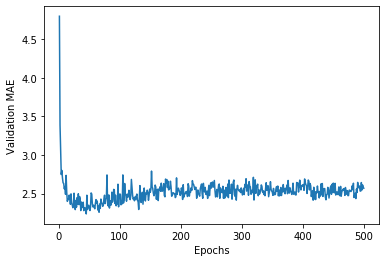

In [51]:
import matplotlib.pyplot as plt
plt.plot(range(1,len(average_mae_history) +1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

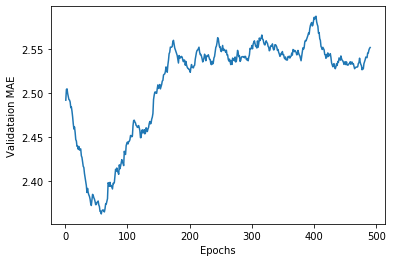

In [57]:
def smooth_curve(points, factor=0.95):
    smoothed_points= []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor +point * (1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history= smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) +1 ), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validataion MAE')
plt.show()
    

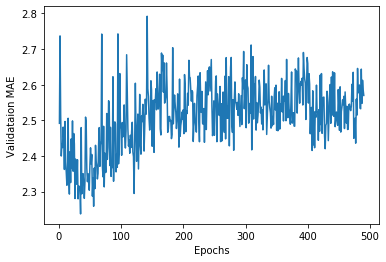

In [54]:
smooth_mae_history= average_mae_history[10:]

plt.plot(range(1, len(smooth_mae_history) +1 ), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validataion MAE')
plt.show()

In [55]:
[] == True

False

In [73]:
model = models.Sequential()
model.add(layers.Dense(1,input_shape=(2,)))

In [74]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
